# Laptop Price Prediction
## Group 08

## Wijetunga I.U. - EG/2020/4303
## Senevirathna K.M.A.N. - EG/2020/4360

In [1]:
!pip install numpy
!pip install pandas

In [344]:
#importing numpy pandas matplotlib and seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
#importing the dataset using pandas
data = pd.read_csv("laptop_price.csv",encoding = 'latin-1')
#first five rows of the data
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [346]:
#shape of the data(rows and columns)
data.shape

(1303, 12)

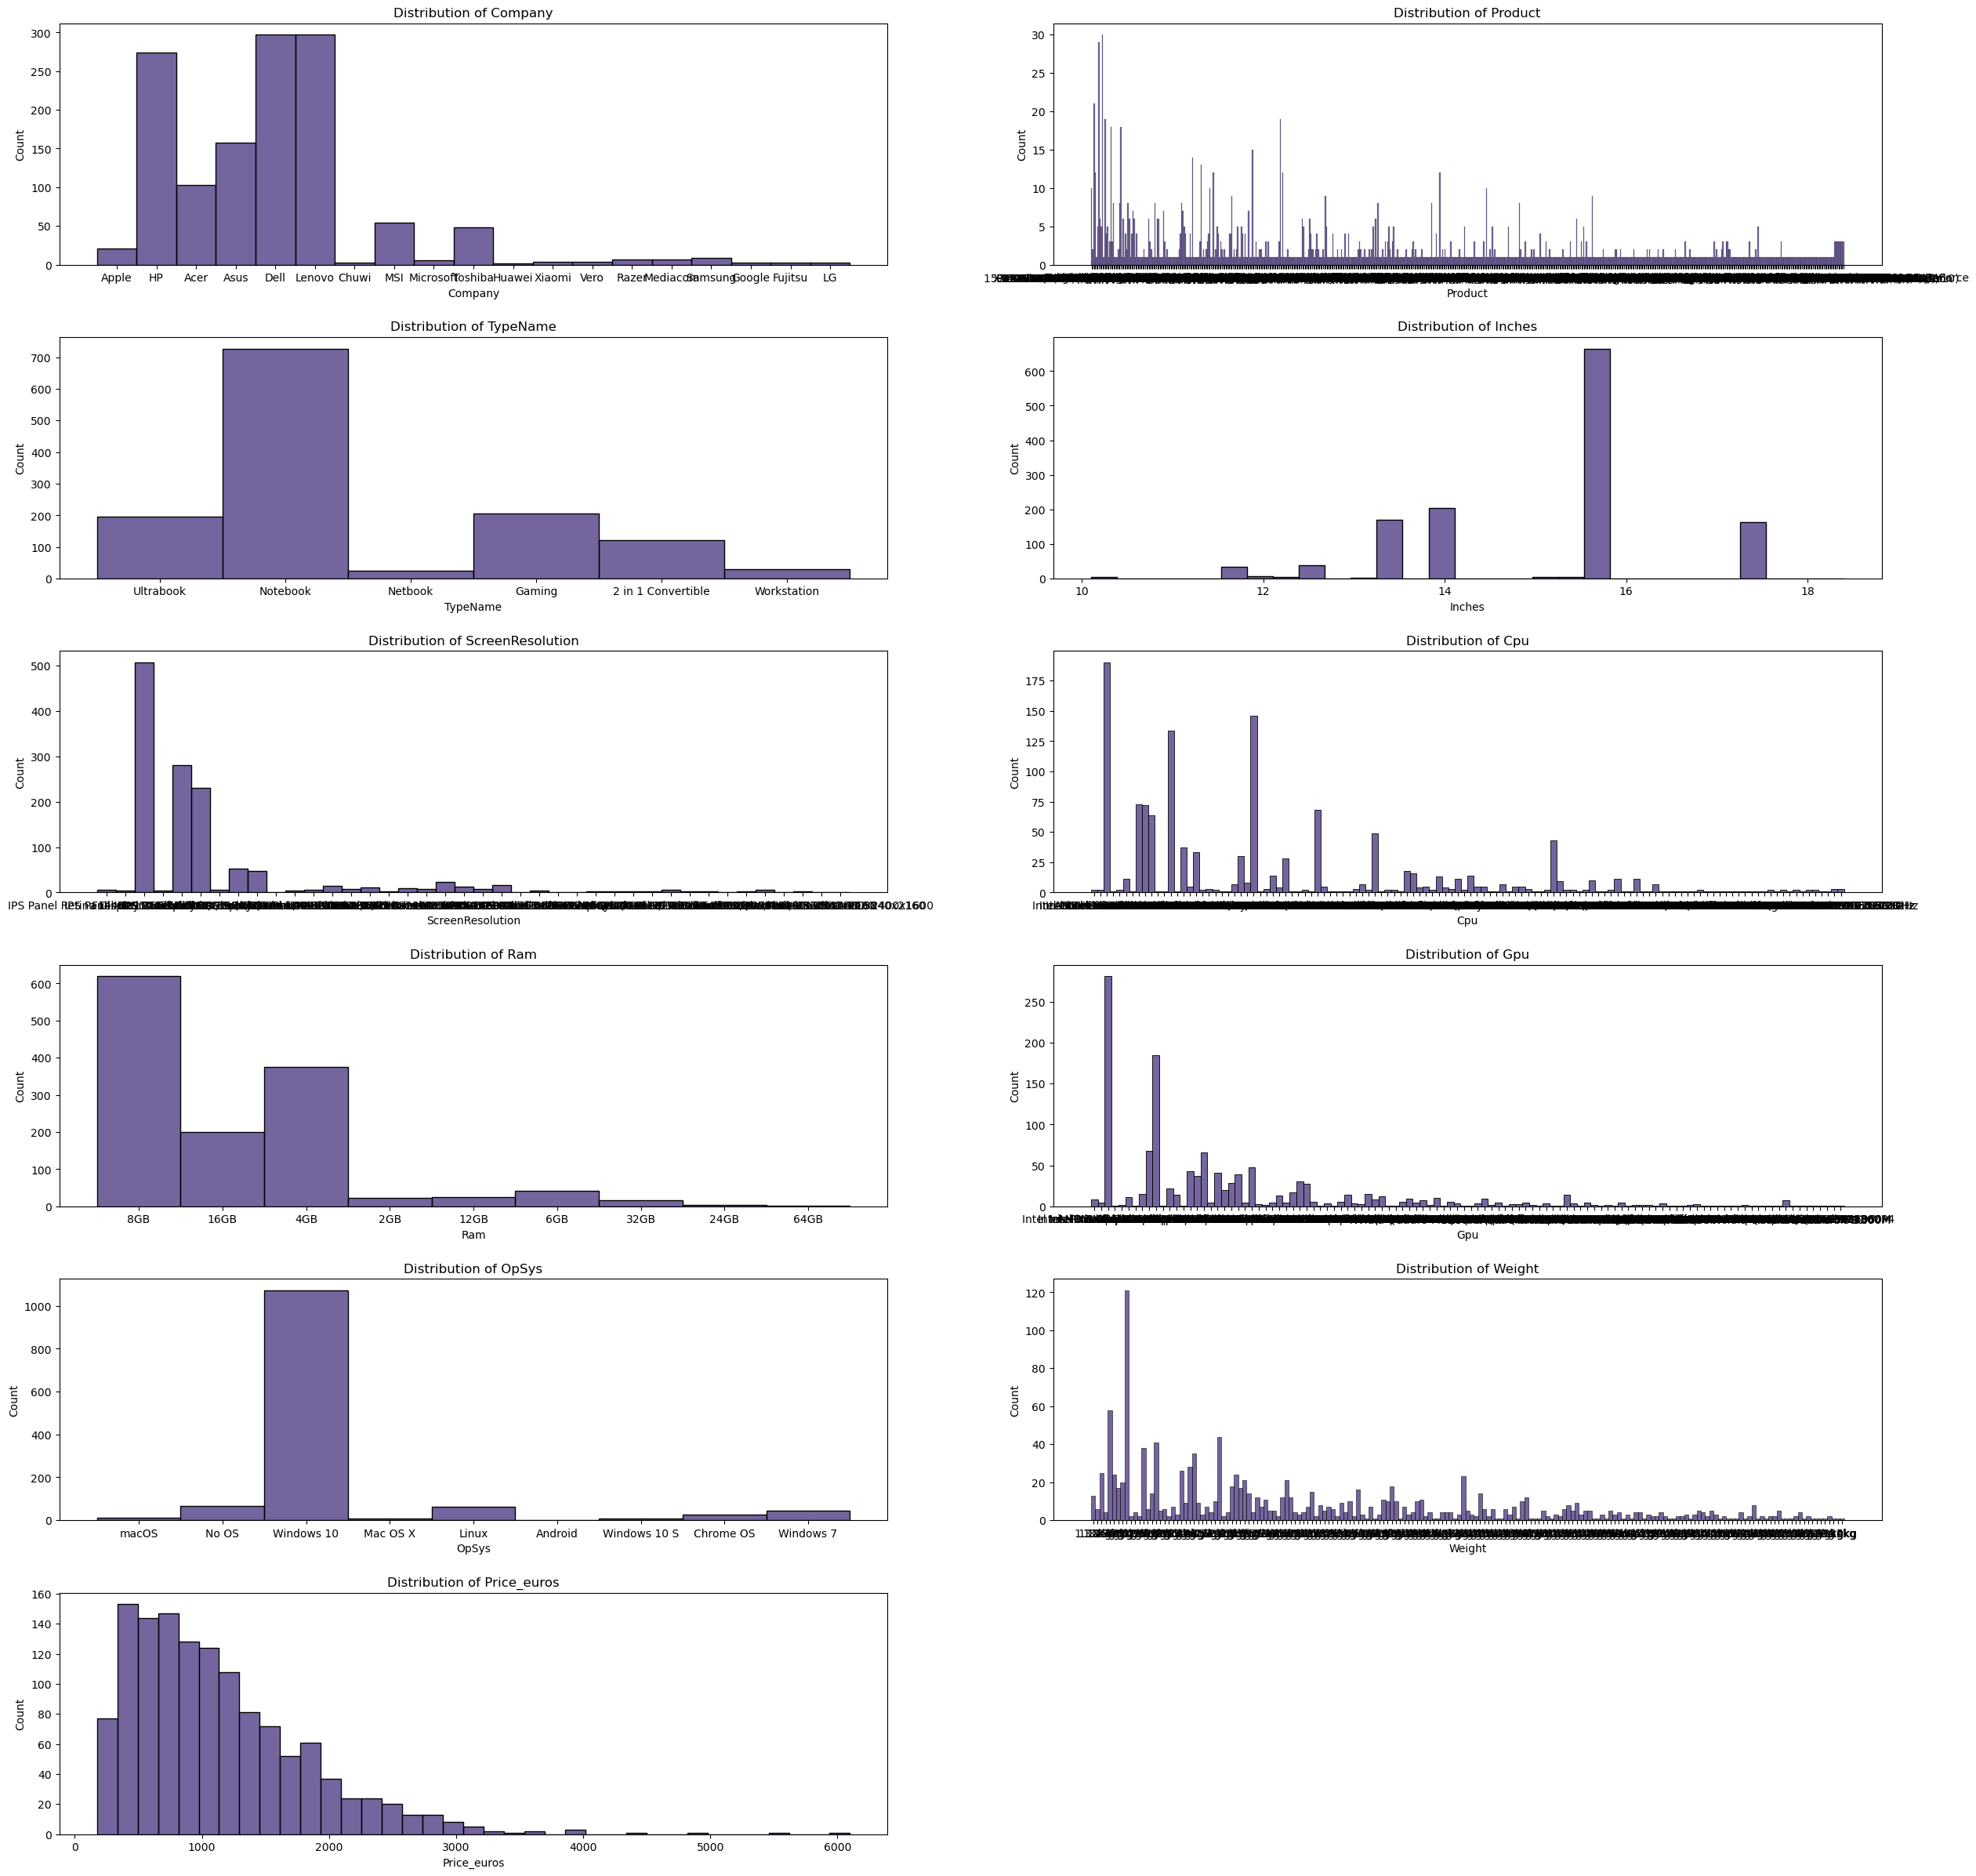

In [347]:
# Set the overall figure size
plt.figure(figsize=(30, 30))

# Choose a vibrant color palette
sns.set_palette("viridis")

# Create subplots for each feature
for i, col in enumerate(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Gpu','OpSys','Weight','Price_euros']):
    plt.subplot(6, 2, i + 1)
    sns.histplot(data[col], kde=False) 
    plt.title(f'Distribution of {col}')

# Adjust layout for better visualization and increase space between rows
plt.subplots_adjust(hspace=0.3)

# Show the plots
plt.show()

In [348]:
#check the number of missing values
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [349]:
#info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [350]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [351]:
#Changing the data types of Ram and Weight to neumerical data types
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')

In [352]:
#Printing the new data types of Ram and Weight
print(data['Ram'].dtype)
print(data['Weight'].dtype)

int32
float32


In [353]:
#First two data of the dataset
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94


In [354]:
#Information of changed data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(7)
memory usage: 112.1+ KB


In [355]:
#Value count of companies
data['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [356]:
#Companies that have below than 10 laptops categorize as Other
def add_company(input):
    if input == 'Samsung' or input == 'Razer' or input == 'Mediacom' or input == 'Microsoft' or input == 'Xiaomi' or input == 'Vero' or input == 'Chuwi' or input == 'Google' or input == 'Fujitsu' or input == 'LG' or input == 'Huawei':
      return 'Other'
    else:
        return input

#Applying the add_company method and save the new data
data['Company'] = data['Company'].apply(add_company)

In [357]:
#New company value count
data['Company'].value_counts()

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: count, dtype: int64

In [358]:
#Product value count
data['Product'].value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [359]:
#number of product items
len(data['Product'].value_counts())

618

In [360]:
#Value count of typename
data['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [361]:
# value count of screen resoulution
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [362]:
#instead of ScreenResolution Creating two columns called touchsceen and IPS
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [363]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0


In [364]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [365]:
len(data['Cpu'].value_counts())

118

In [366]:
#Instead of Whole Cpu creating a new column called cpu_name and add the first 3 words of Cpu to that
data['cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [367]:
data['cpu_name'].value_counts()

cpu_name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [368]:
#Divide Cpu_name into 5 categories called Intel Core i3,Intel Core i5,Intel Core i7,AMD and Other
def set_processor(name):
    if name == 'Intel Core i7' or  name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other'

data['cpu_name'] = data['cpu_name'].apply(set_processor)

In [369]:
data['cpu_name'].value_counts()

cpu_name
Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: count, dtype: int64

In [370]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [371]:
len(data['Gpu'].value_counts())

110

In [372]:
#instead of full name taking only the first name of the gpu and create a new column
data['gpu_name'] = data['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))

In [373]:
data['gpu_name'].value_counts()

gpu_name
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [374]:
data.shape

(1303, 16)

In [375]:
#deleting the ARM data
data = data[data['gpu_name'] != 'ARM']

In [376]:
data.shape

(1302, 16)

In [377]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,Intel


In [378]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [379]:
#Divide OpSys into 4 categories called Windows,macOS,Linux and Other
def set_os(input):
     if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10 S':
         return 'Windows'
     elif input == 'macOS' or input == 'Mac OS X':
        return 'Mac'
     elif input == 'Linux':
         return input
     else:
         return 'Other'

data['OpSys'] = data['OpSys'].apply(set_os)

In [380]:
data['OpSys'].value_counts()

OpSys
Windows    1125
Other        94
Linux        62
Mac          21
Name: count, dtype: int64

In [381]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,Intel Core i5,Intel


In [382]:
#drop the unnessary columns
data = data.drop(columns =['laptop_ID','Inches','Product','Cpu','Gpu','ScreenResolution'])

In [383]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,Apple,Ultrabook,8,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,898.94,0,0,Intel Core i5,Intel
2,HP,Notebook,8,Other,1.86,575.00,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,16,Mac,1.83,2537.45,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,8,Mac,1.37,1803.60,0,1,Intel Core i5,Intel


In [384]:
#use one hot encoding
data = pd.get_dummies(data)

In [385]:
data.head(2)

,Ram,Weight,Price_euros,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,1339.69,0,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,8,1.34,898.94,0,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [386]:
#convert true false values to one and zero
columns_to_convert = [col for col in data.columns if col != 'Weight']
data[columns_to_convert] = data[columns_to_convert].astype(int)

In [387]:
#new data info after pre processing
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ram                          1302 non-null   int64  
 1   Weight                       1302 non-null   float32
 2   Price_euros                  1302 non-null   int64  
 3   Touchscreen                  1302 non-null   int64  
 4   IPS                          1302 non-null   int64  
 5   Company_Acer                 1302 non-null   int64  
 6   Company_Apple                1302 non-null   int64  
 7   Company_Asus                 1302 non-null   int64  
 8   Company_Dell                 1302 non-null   int64  
 9   Company_HP                   1302 non-null   int64  
 10  Company_Lenovo               1302 non-null   int64  
 11  Company_MSI                  1302 non-null   int64  
 12  Company_Other                1302 non-null   int64  
 13  Company_Toshiba        

In [388]:
#Ram and Weight feature scaling
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Ram', 'Weight']
scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
data.head()

,Ram,Weight,Price_euros,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,0.096774,0.169576,1339,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.096774,0.162095,898,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.096774,0.291771,575,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0.225806,0.284289,2537,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.096774,0.169576,1803,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [389]:
data.shape

(1302, 32)

In [390]:
#Defining the input and output values
x = data.drop('Price_euros',axis=1)
y = data['Price_euros']

In [391]:
data.head(2)

,Ram,Weight,Price_euros,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,0.096774,0.169576,1339,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.096774,0.162095,898,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [392]:
data.shape

(1302, 32)

In [393]:
!pip install scikit-learn

zsh:1: command not found: pip


In [394]:
#Spliting data for train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.25)

In [395]:
x_train.shape, x_test.shape

((976, 31), (326, 31))

In [396]:
#defining the model
def model_acc(model):
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    print(str(model)+ '-->'+ str(acc))

In [397]:
#using linear regression and random forest algorithms to calculate accuracy
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression()-->0.7306189734594082
RandomForestRegressor()-->0.7925068754771579


In [399]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [10, 50, 100],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}


grid_obj = GridSearchCV(estimator= rf, param_grid = parameters )

grid_fit = grid_obj.fit(x_train,y_train)



best_model = grid_fit.best_estimator_
best_params = grid_fit.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)


Best Model: RandomForestRegressor(criterion='absolute_error')
Best Parameters: {'criterion': 'absolute_error', 'n_estimators': 100}


In [400]:
#Defining the best model got with hyperparameter tuning
best_model.score(x_test,y_test)

0.7893810029840271

In [282]:
#creating a pickle file to delpoy for a website
import pickle
with open('predictor.pickle','wb') as file:
    pickle.dump(best_model,file)

In [283]:
#input columns
x_train.columns

Index(['Ram', 'Weight', 'Touchscreen', 'IPS', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Other', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'cpu_name_AMD', 'cpu_name_Intel Core i3', 'cpu_name_Intel Core i5',
       'cpu_name_Intel Core i7', 'cpu_name_Other', 'gpu_name_AMD',
       'gpu_name_Intel', 'gpu_name_Nvidia'],
      dtype='object')

In [284]:
best_model.predict([[8,1.3,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0]])

/Users/isitha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2143.57683333])